In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, roc_curve, auc

# visulizon
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load dataset 
df_test = pd.read_csv('../datasets/NumericalText/titanic/test.csv')
df_train = pd.read_csv('../datasets/NumericalText/titanic/train.csv')

In [5]:
#Display datasets to show missing, inconsistent data 
df_test.head(10)
#Age missing exists
# Cabin 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
#Combine datasets for consistent processing 
# train, test 
# conctation 
df_concated = pd.concat([df_train, df_test], keys =['train', 'test'])

### Preprocessing Steps
- filling missing values in columns 
    - Age and Fare using the median
    - Embarked ( char ) using mode 
---
- Creating new Feature for better learning performance
    -  These features aim to capture potentially useful information about passengers' social connections aboard the Titanic.
    - `FimalySize` Feature 
        - `SibSp`Number of siblings and spouses aboard.
        - `Parch` Numer of Parents and Childern aboard.
        - adding one for the passanger themselves
        -  making FamilySize a comprehensive measure of a passenger's group 
        size.
    - `ISAlone` Feature
        - This feature identifies passengers traveling alone 
        - 
--- 
- Encoding char columns using one Hot Encoding in LabelEncoder
- drop unused columns due to serveral reasons
    - Columns are `Cabin`, `SibSp`, `Parch`
    - High Missing Rate `Cabin` Feature
    - low predictice power 
    - to reduce the noise and simplify the dataset 
    

In [ ]:
#Preprocessing Step 

# missing values in Age, Fare, and Embarked 
df_concated['Age'].fillna(df_concated['Age'].median(), inplace=True)  
df_concated['Fare'].fillna(df_concated['Fare'].median(), inplace =  True)
# char values 
df_concated['Embarked'].fillna(df_concated['Embarked'].mode(), inplace=True)

# Create new features
df_concated['FamilySize'] = df_concated['SibSp'] + df_concated['Parch'] + 1
df_concated['IsAlone'] = (df_concated['FamilySize'] == 1).astype(int)

#Encoding Categorical values 
le = LabelEncoder()
df_concated['Sex'] = df_concated['Sex'].map({'male': 0, 'female': 1})  # Encode Sex
df_concated['Embarked'] = le.fit_transform(df_concated['Embarked']) # one Hot Encode 

df_concated = df_concated.drop(columns= ['Cabin','SibSp','Parch'])

df_concated.head(20)

In [9]:
# Split back into train and test
train_processed = df_concated.loc['train']
test_processed = df_concated.loc['test']

In [ ]:
 # Select features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

# Split training data
X = train_processed[features]
Y = train_processed['Survived'] # target 
# test_processed['Survived']

# or using another way 
#X = train_processed.drop(['Survivied'], axis=1)
# Y = train_processed['Survived']
# Split test data (no target variable)
# X_test = test_processed[features] # jus for kaggle submission purpose 


# the dataset is used for kaggle submission, so no target 

In [14]:
# split training date and Standrized it (transforme or normalize)

X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y 
    )
    # straify=Y -> Maintains the same proportion of survivors/non-survivors in both train and test sets
# Scale the features
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) # just for features 
X_test_scaled = scaler.transform(X_test) # just for train (target)

In [15]:
# Initialize Models
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
# Train KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1] 

In [17]:
# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [18]:
# Evaluation Functions
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"=== {model_name} Evaluation ===")
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred) # target, pred
    print(f"Accuracy: {accuracy:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred) # linear
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # Precision and Recall
    precision = precision_score(y_test, y_pred) # score is tp / (tp + fp)
    recall = recall_score(y_test, y_pred)  # score is tp / (tp + fn )
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob) #Compute Receiver operating characteristic (ROC).
    roc_auc = auc(fpr, tpr) # Compute Area Under the Curve (AUC) using the trapezoidal rule.
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

=== K-Nearest Neighbors Evaluation ===
Accuracy: 0.67


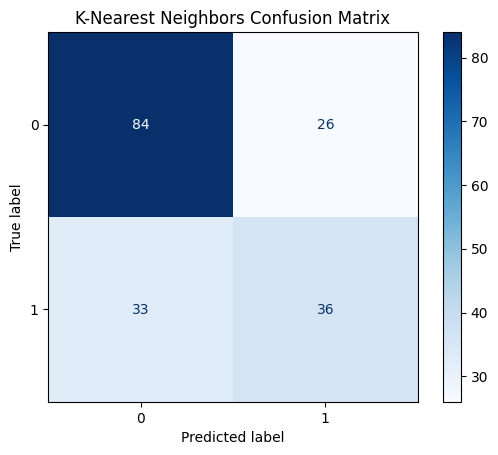

Precision: 0.58
Recall: 0.52


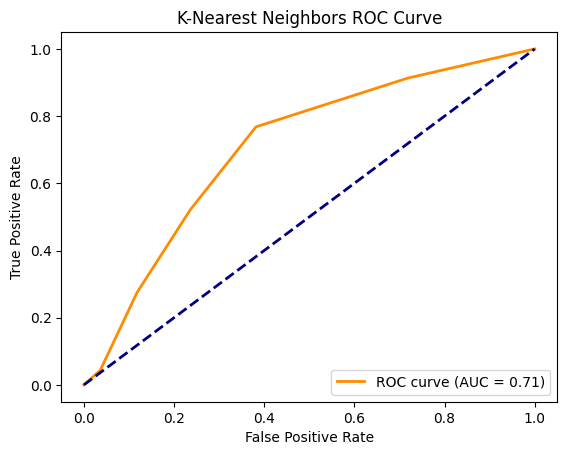

In [19]:
# Evaluate KNN
evaluate_model(y_test, y_pred_knn, y_prob_knn, "K-Nearest Neighbors")

=== Logistic Regression Evaluation ===
Accuracy: 0.81


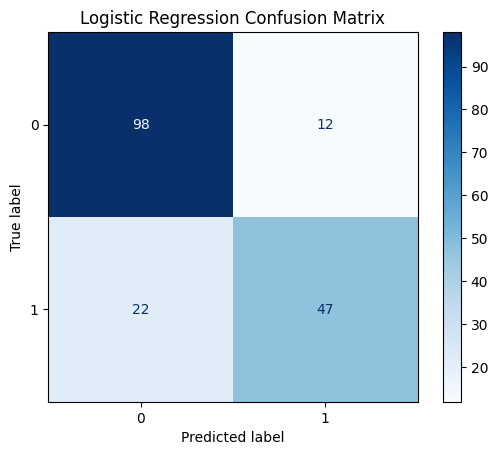

Precision: 0.80
Recall: 0.68


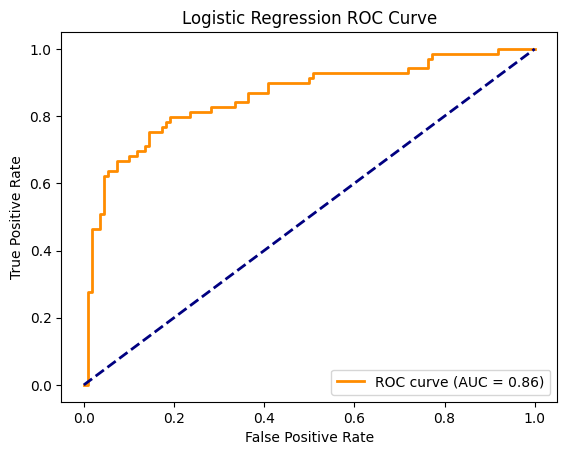

In [20]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")